# Exploration Data Analysis

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew # for some statistics

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


## Quick Exploration Data

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Target variable "SalePrice"

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


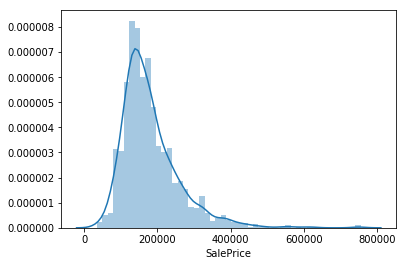

In [9]:
# histogram
sns.distplot(train["SalePrice"])

In [10]:
# skewness and kurtosis
print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


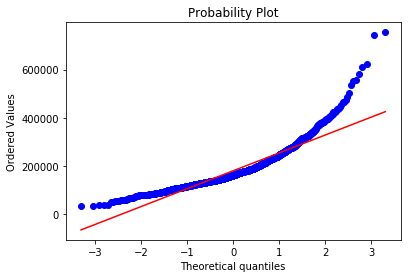

In [11]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

## Outliers

1. 右下兩個點似乎有點像 outlier

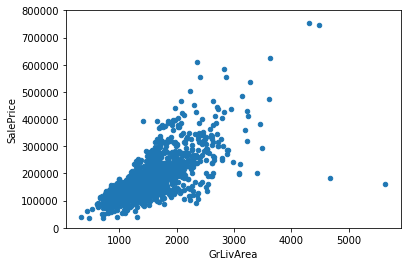

In [13]:
# scatter plot GrLivArea
var = "GrLivArea"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

## Scatter plot with target feature

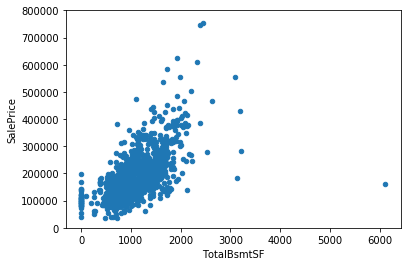

In [21]:
# scatter plot TotalBsmtSF
var = "TotalBsmtSF"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

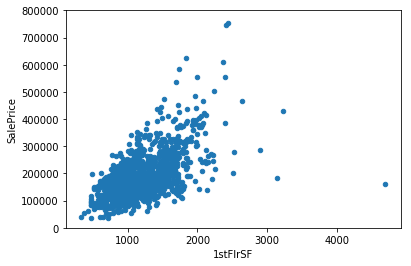

In [40]:
# scatter plot 1stFlrSF
var = "1stFlrSF"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

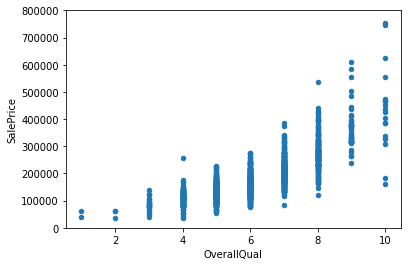

In [25]:
# scatter plot OverallQual
var = "OverallQual"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

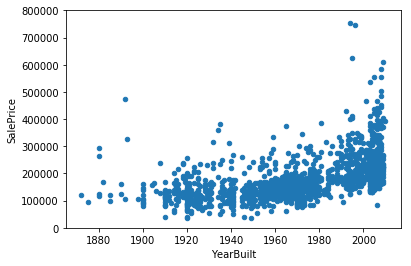

In [27]:
# scatter plot YearBuilt
var = "YearBuilt"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

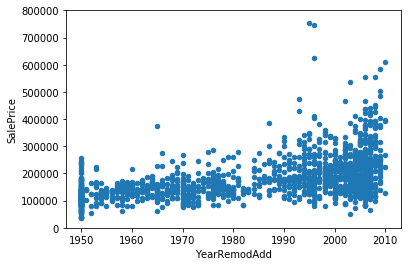

In [34]:
# scatter plot YearRemodAdd
var = "YearRemodAdd"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

## Concat training and testing data

In [19]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(["SalePrice"], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


## Missing Value

In [21]:
# missing data
total = all_data.isnull().sum()
percent = (all_data.isnull().sum() / all_data.isnull().count())
dtype = all_data.dtypes
missing_data = pd.concat([dtype, total, percent], axis=1, keys=["Types", "Total", "Percent"]).sort_values(by="Total", ascending=False)
missing_data.head(30)

,Types,Total,Percent
PoolQC,object,2909,0.996574
MiscFeature,object,2814,0.964029
Alley,object,2721,0.932169
Fence,object,2348,0.804385
FireplaceQu,object,1420,0.486468
LotFrontage,float64,486,0.166495
GarageYrBlt,float64,159,0.054471
GarageQual,object,159,0.054471
GarageFinish,object,159,0.054471
GarageCond,object,159,0.054471


In [27]:
pd.set_option("max_columns", None)
all_data[all_data["PoolArea"] > 0 & all_data["PoolQC"].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
197,1360,1360,0,NaN,4,1Fam,TA,No,1036.0,184.0,GLQ,LwQ,1.0,1.0,TA,140.0,Y,Artery,Norm,SBrkr,552,Gd,Gd,Stucco,Stucco,GdPrv,Ex,1,PConc,2,Typ,795.0,2.0,TA,Unf,TA,Detchd,1918.0,3112,0,GasA,Gd,2Story,198,1,Gd,Lvl,Gtl,25419,Corner,174.0,Reg,392,75,RL,0.0,None,NaN,0,3,NAmes,16,4,8,Y,512,Ex,CompShg,Gable,Abnorml,WD,0,Pave,8,1360.0,AllPub,0,1918,1990,2006
810,1309,0,0,NaN,3,1Fam,TA,No,663.0,377.0,ALQ,LwQ,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,Fa,1,CBlock,1,Typ,484.0,2.0,TA,RFn,TA,Attchd,1974.0,1309,1,GasA,Fa,1Story,811,1,Gd,Lvl,Gtl,10140,Inside,78.0,Reg,0,20,RL,99.0,BrkFace,NaN,0,1,NWAmes,0,6,6,Y,648,Fa,CompShg,Hip,Normal,WD,0,Pave,5,1040.0,AllPub,265,1974,1999,2006
1170,1118,0,0,NaN,3,1Fam,TA,Av,522.0,0.0,ALQ,Unf,1.0,0.0,TA,574.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.0,1.0,TA,Fin,TA,Attchd,1977.0,1118,0,GasA,TA,SLvl,1171,1,TA,Lvl,Gtl,9880,Inside,76.0,Reg,0,80,RL,0.0,None,NaN,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,WD,0,Pave,6,1096.0,AllPub,203,1977,1977,2008
1182,2411,2065,0,NaN,4,1Fam,TA,Av,2096.0,0.0,GLQ,Unf,1.0,0.0,Ex,300.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,ImStucc,MnPrv,TA,2,PConc,3,Typ,813.0,3.0,TA,Fin,TA,Attchd,1996.0,4476,1,GasA,Ex,2Story,1183,1,Ex,Lvl,Gtl,15623,Corner,160.0,IR1,0,60,RL,0.0,None,NaN,0,7,NoRidge,78,5,10,Y,555,Ex,CompShg,Hip,Abnorml,WD,0,Pave,10,2396.0,AllPub,171,1996,1996,2007
1298,4692,950,0,NaN,3,1Fam,TA,Gd,5644.0,0.0,GLQ,Unf,2.0,0.0,Ex,466.0,Y,Feedr,Norm,SBrkr,0,TA,Ex,Stucco,Stucco,NaN,Gd,3,PConc,2,Typ,1418.0,2.0,TA,Fin,TA,Attchd,2008.0,5642,1,GasA,Ex,2Story,1299,1,Ex,Bnk,Gtl,63887,Corner,313.0,IR3,0,60,RL,796.0,Stone,NaN,0,1,Edwards,292,5,10,Y,480,Gd,ClyTile,Hip,Partial,New,0,Pave,12,6110.0,AllPub,214,2008,2008,2008
1386,1392,1392,0,NaN,5,1Fam,TA,No,790.0,469.0,BLQ,LwQ,1.0,0.0,Gd,133.0,Y,RRAn,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,3,Typ,564.0,2.0,TA,RFn,TA,Attchd,1978.0,2784,1,GasA,TA,2Story,1387,1,Gd,Lvl,Gtl,16692,Inside,80.0,IR1,0,60,RL,184.0,BrkFace,TenC,2000,7,NWAmes,112,5,7,Y,519,Fa,CompShg,Gable,Normal,WD,440,Pave,12,1392.0,AllPub,0,1978,1978,2006
1423,1575,626,0,NaN,4,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Gd,697.0,Y,Norm,Norm,SBrkr,0,Gd,Gd,Plywood,Plywood,GdPrv,Gd,1,CBlock,2,Typ,432.0,2.0,Gd,Unf,Gd,Attchd,1966.0,2201,0,GasA,TA,SLvl,1424,1,Gd,Lvl,Gtl,19690,CulDSac,NaN,IR1,0,80,RL,0.0,None,NaN,0,8,Edwards,236,7,6,Y,738,Gd,Tar&Grv,Flat,Alloca,WD,0,Pave,8,697.0,AllPub,586,1966,1966,2006
1974,2470,0,0,NaN,1,1Fam,TA,Gd,2257.0,0.0,GLQ,Unf,2.0,0.0,Ex,278.0,Y,Norm,Norm,SBrkr,0,TA,Ex,MetalSd,MetalSd,NaN,Gd,2,PConc,1,Typ,789.0,3.0,TA,Fin,TA,Attchd,2003.0,2470,1,GasA,Ex,1Story,1975,1,Ex,HLS,Mod,12720,Inside,106.0,Reg,0,20,RL,680.0,Stone,NaN,0,2,NridgHt,65,5,10,Y,144,Ex,CompShg,Hip,Normal,WD,216,Pave,7,2535.0,AllPub,154,2003,2003,2008
2420,1647,0,0,NaN,3,1Fam,TA,No,595.0,354.0,BLQ,Rec,1.0,0.0,TA,156.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdPrv,Fa,1,CBlock,1,Min1,280.0,1.0,TA,Fin,TA,Attchd,1953.0,1647,0,GasA,Gd,1Story,2421,1,TA,Lvl,Gtl,9532,Inside,75.0,Reg,0,20,RL,0.0,None,NaN,0,2,NAmes,0,6,4,Y,368,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1105.0,AllPub,225,1953,1953,2007
2503,1105,717,0,NaN,4,1Fam,TA,No,0.0,0.0,

- 有三筆 "PoolQC" 為 NaN，但 "PoolArea" > 0，因此這三筆缺失值可以透過 OverallQual(4 Below Average, 6 Above Average, 3 Fair) --> (Fa, Gd, Fa)

In [28]:
pd.set_option("max_columns", None)
all_data[(all_data["GarageType"] == "Detchd") & all_data["GarageYrBlt"].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2126,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,Rec,Unf,0.0,0.0,TA,1046.0,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.0,1.0,NaN,NaN,NaN,Detchd,NaN,1984,0,GasA,Gd,2.5Unf,2127,1,TA,Lvl,Gtl,8094,Inside,57.0,Reg,0,60,RM,0.0,None,Shed,1000,9,OldTown,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008
2576,942,886,0,NaN,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


有兩筆 "GarageYrBlt" 為 NaN，但 GarageType"="Detchd"，因此這兩筆缺失值可以透過 中位數來回填。而其他 "GarageXXX" 要依照此方法處裡

## Check categorical feature

- 檢查數據是否集中在同一個類別，如果是，可能要刪除

In [33]:
object_features = []
for i in all_data.columns:
    if all_data[i].dtype == object:
        object_features.append(i)
        
for obj in object_features:
    print("features:{}".format(obj))
    print(all_data[obj].value_counts())
    print('-----')

features:Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64
-----
features:BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
-----
features:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
-----
features:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
-----
features:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
-----
features:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
-----
features:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
-----
features:CentralAir
Y    2723
N     196
Name: CentralAir, dtype: int64
-----
features:Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Cond

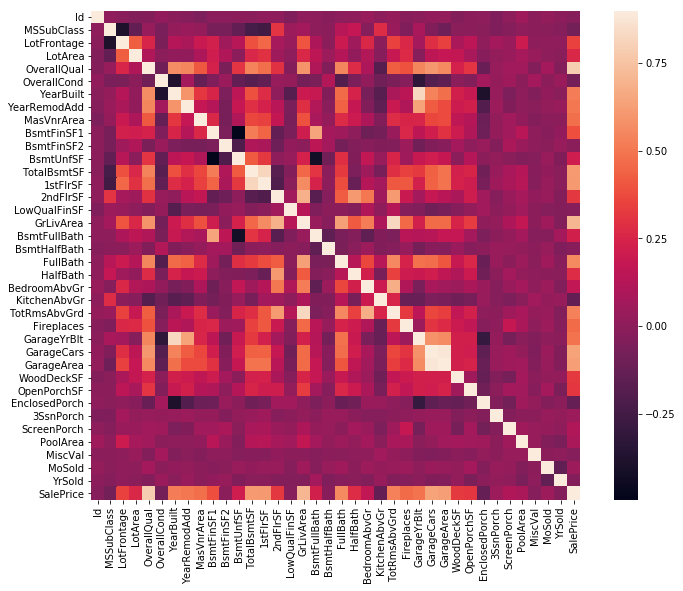

In [32]:
# Correlation map to see how features are correlated with SalePrice
corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

- "OverallQual", "GrLivArea" 和 "TotalBsmtSF" 跟 "SalePrice" 有比較強的相關性
- "GarageCars" 和 "GarageArea" 也是有較強的相關性，但這兩個變數其實隱約代表相同的意思，面積越大可以停的車當然也越多，反之亦然
- "TotalBsmtSF" 和 "1stFlrSF" 也有相同的情況
- "TotRmsAbvGrd" 和 "GrLivArea" 也有相同的情況
- "YearBuilt" 和 "YearRemodAdd" 也有相同的情況，但 "YearRemodAdd" 在 scatter plot 似乎就沒有很明顯
- "FullBath" 跟房子面積類似的道理，房子面積越大，房間可能會越完整

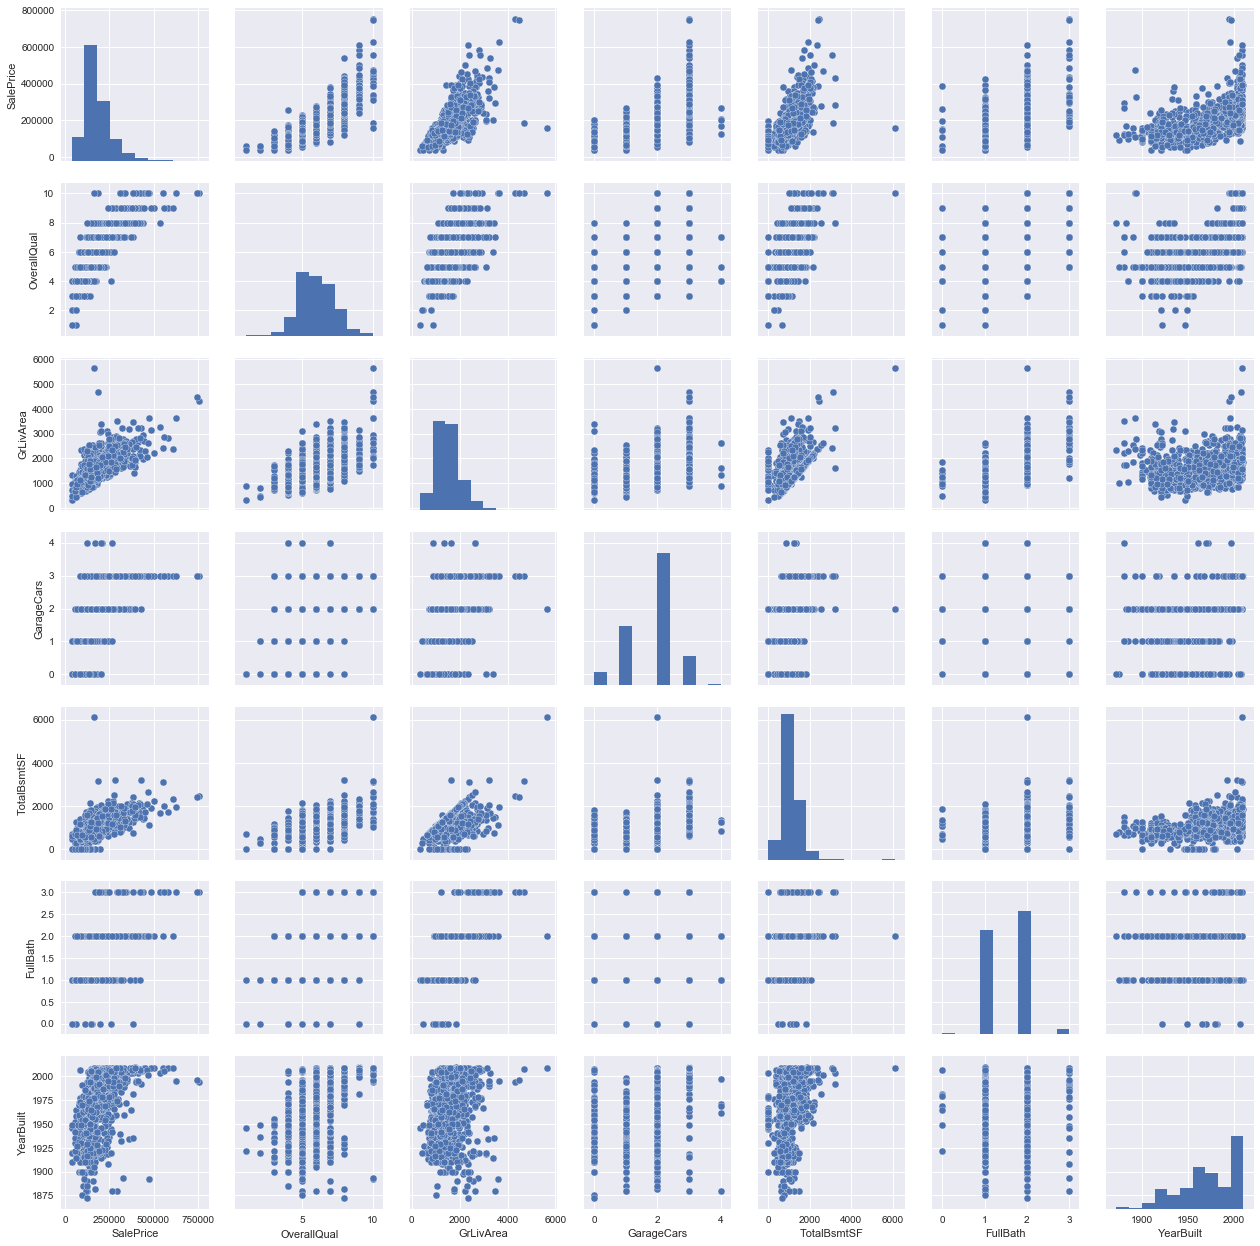

In [46]:
# scatter plot
sns.set()
cols = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(train[cols], size = 2.5)
plt.show()

- "YearBuilt" 和 "SalePrice" 可以發現最近的房子高房價的比例越來越高
- "TotalBsmtSF" 和 "GrLivArea" 可以得知絕大多數的房子地下室面積不會大於地面上的面積

In [37]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Text(0.5,1,'Percent missing data by feature')

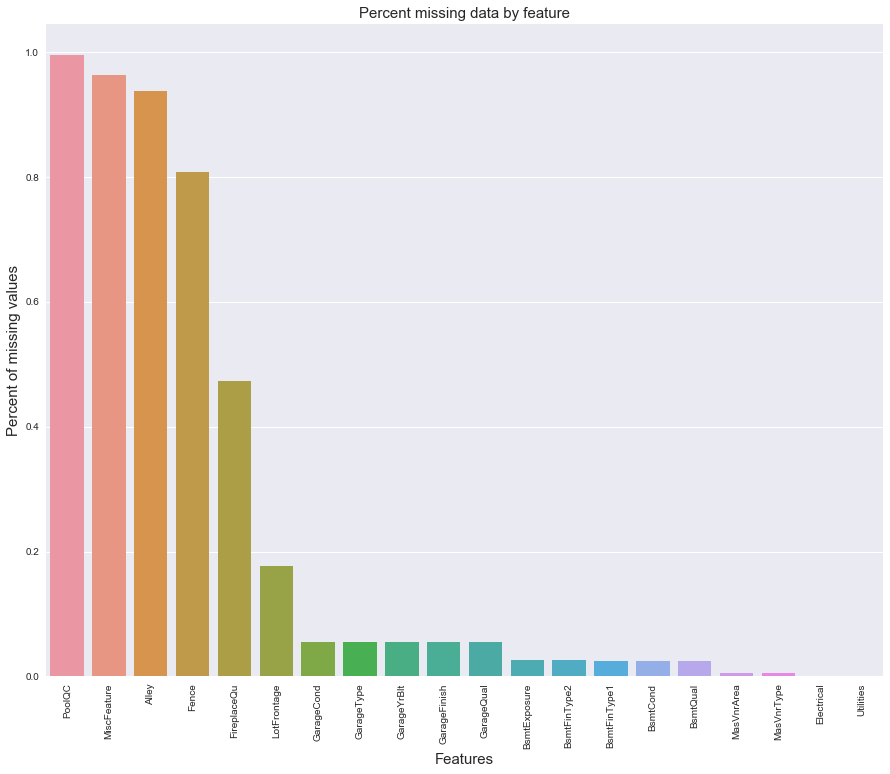

In [48]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation="90")
sns.barplot(x=total.index[0:20], y=percent[0:20])
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)

- PoolQC 推測絕大多數的房子沒有游泳池
- MiscFeature: Miscellaneous feature not covered in other categories 目前沒有想法
- Alley: Type of alley access 目前沒有想法
- Fence: 或許是多數房子根本沒有圍籬，之後可以根據時間觀看這變數的變化
- FireplaceQu:或許是多數房子根本沒有壁爐，之後可以根據時間觀看這變數的變化
- LotFrontage: 街道到房子的距離，對於缺失值沒有想法
- Garage 相關的變數因為房子沒有車庫導致會有缺失值，利用 GarageCars==0 的數量和 GarageTypes=="None" 的數量來看是否相等，結果相等，也證明缺失值原因
- Bsmt 跟 Garage 有一樣的情況
- MasVnrArea: Masonry veneer area in square feet 似乎是磚塊的面積，感覺跟屋況品質有點像
- MasVnrType: Masonry veneer type 似乎是磚塊的類型
- Electrical: 只有一個缺失值直接用最多的代替或刪掉該筆資料

In [38]:
# missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(40)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


Text(0.5,1,'Percent missing data by feature')

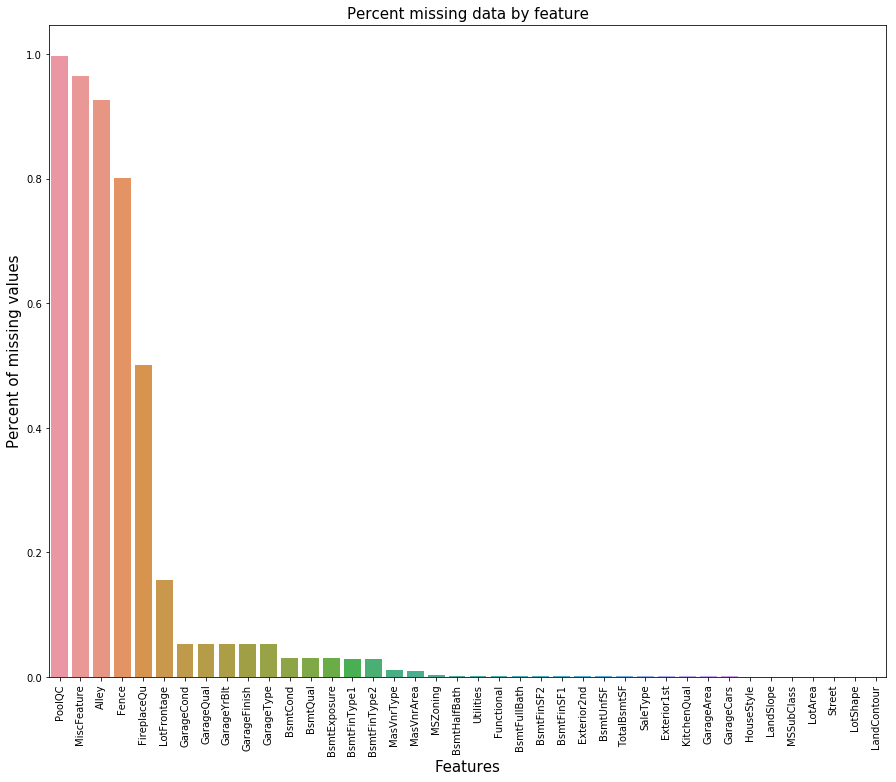

In [25]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation="90")
sns.barplot(x=total.index[0:40], y=percent[0:40])
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)

In [73]:
train["PoolQC"] = train["PoolQC"].fillna("None")
var = "PoolQC"
data = train[[var, "SalePrice"]]
data = data.groupby([var]).mean()
data

,SalePrice
PoolQC,
Ex,490000.000000
Fa,215500.000000
Gd,201990.000000
None,180404.663455


In [75]:
var = "PoolQC"
data = train[[var, "SalePrice"]][train[var] == "Gd"]
data

,PoolQC,SalePrice
1170,Gd,171000
1298,Gd,160000
1423,Gd,274970


In [89]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
var = "FireplaceQu"
data = train[[var, "SalePrice"]]
data.groupby([var]).agg(['mean', 'count'])

SalePrice      
                      mean count
FireplaceQu                     
Ex           337712.500000    24
Fa           167298.484848    33
Gd           226351.415789   380
None         141331.482609   690
Po           129764.150000    20
TA           205723.488818   313

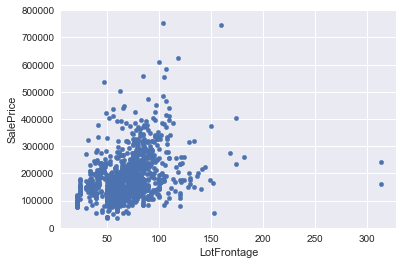

In [90]:
var = "LotFrontage"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

In [93]:
train["GarageType"] = train["GarageType"].fillna("None")
print(len(train[train["GarageType"] == "None"]))
print(len(train[train["GarageCars"] == 0]))

81
81


In [15]:
train["Utilities"] = train["Utilities"].fillna("None")
var = "Utilities"
data = train[[var]]
data.groupby([var]).size()

Utilities
AllPub    1459
NoSeWa       1
dtype: int64

In [16]:
test["Utilities"] = test["Utilities"].fillna("None")
var = "Utilities"
data = test[[var]]
data.groupby([var]).size()

Utilities
AllPub    1457
None         2
dtype: int64

In [17]:
train["Functional"] = train["Functional"].fillna("None")
var = "Functional"
data = test[[var]]
data.groupby([var]).size()

Functional
Maj1       5
Maj2       4
Min1      34
Min2      36
Mod       20
Sev        1
Typ     1357
dtype: int64

In [18]:
test["Functional"] = test["Functional"].fillna("None")
var = "Functional"
data = test[[var]]
data.groupby([var]).size()

Functional
Maj1       5
Maj2       4
Min1      34
Min2      36
Mod       20
None       2
Sev        1
Typ     1357
dtype: int64

In [26]:
train["Exterior1st"] = train["Exterior1st"].fillna("None")
var = "Exterior1st"
data = test[[var]]
data.groupby([var]).size()

Exterior1st
AsbShng     24
AsphShn      1
BrkComm      4
BrkFace     37
CBlock       1
CemntBd     65
HdBoard    220
MetalSd    230
Plywood    113
Stucco      18
VinylSd    510
Wd Sdng    205
WdShing     30
dtype: int64

In [27]:
test["Exterior1st"] = test["Exterior1st"].fillna("None")
var = "Exterior1st"
data = test[[var]]
data.groupby([var]).size()

Exterior1st
AsbShng     24
AsphShn      1
BrkComm      4
BrkFace     37
CBlock       1
CemntBd     65
HdBoard    220
MetalSd    230
None         1
Plywood    113
Stucco      18
VinylSd    510
Wd Sdng    205
WdShing     30
dtype: int64

In [28]:
train["Exterior2nd"] = train["Exterior2nd"].fillna("None")
var = "Exterior2nd"
data = train[[var]]
data.groupby([var]).size()

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
dtype: int64

In [29]:
test["Exterior2nd"] = test["Exterior2nd"].fillna("None")
var = "Exterior2nd"
data = test[[var]]
data.groupby([var]).size()

Exterior2nd
AsbShng     18
AsphShn      1
Brk Cmn     15
BrkFace     22
CBlock       2
CmentBd     66
HdBoard    199
ImStucc      5
MetalSd    233
None         1
Plywood    128
Stone        1
Stucco      21
VinylSd    510
Wd Sdng    194
Wd Shng     43
dtype: int64

In [31]:
train["SaleType"] = train["SaleType"].fillna("None")
var = "SaleType"
data = train[[var]]
data.groupby([var]).size()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
dtype: int64

In [32]:
test["SaleType"] = test["SaleType"].fillna("None")
var = "SaleType"
data = test[[var]]
data.groupby([var]).size()

SaleType
COD        44
CWD         8
Con         3
ConLD      17
ConLI       4
ConLw       3
New       117
None        1
Oth         4
WD       1258
dtype: int64

In [33]:
train["KitchenQual"] = train["KitchenQual"].fillna("None")
var = "KitchenQual"
data = train[[var]]
data.groupby([var]).size()

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
dtype: int64

In [35]:
test["KitchenQual"] = test["KitchenQual"].fillna("None")
var = "KitchenQual"
data = test[[var]]
data.groupby([var]).size()

KitchenQual
Ex      105
Fa       31
Gd      565
None      1
TA      757
dtype: int64

In [6]:
train.groupby(["Utilities"])

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
5       AllPub
6       AllPub
7       AllPub
8       AllPub
9       AllPub
10      AllPub
11      AllPub
12      AllPub
13      AllPub
14      AllPub
15      AllPub
16      AllPub
17      AllPub
18      AllPub
19      AllPub
20      AllPub
21      AllPub
22      AllPub
23      AllPub
24      AllPub
25      AllPub
26      AllPub
27      AllPub
28      AllPub
29      AllPub
         ...  
1430    AllPub
1431    AllPub
1432    AllPub
1433    AllPub
1434    AllPub
1435    AllPub
1436    AllPub
1437    AllPub
1438    AllPub
1439    AllPub
1440    AllPub
1441    AllPub
1442    AllPub
1443    AllPub
1444    AllPub
1445    AllPub
1446    AllPub
1447    AllPub
1448    AllPub
1449    AllPub
1450    AllPub
1451    AllPub
1452    AllPub
1453    AllPub
1454    AllPub
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object